# Step by step customer segmentation (Demographic) using K-Means in Python

In [328]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy

# For Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Data

In [329]:
# Load the segmentaion data 
url = 'https://raw.githubusercontent.com/ugursavci/Customer_Segmentation_Medium/main/segmentation%20data.csv'
segment_df = pd.read_csv(url, index_col=0)

# Explore Data

In [330]:
segment_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [331]:
segment_df.tail()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0
100001999,1,1,24,1,97968,0,0
100002000,0,0,25,0,68416,0,0


In [332]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


<p><b>We see that all features are of int type with no missing values.</b></p>
<p><b>Let’s see the variables(features) in the dataset.</b></p>
<ol>
    <li><b>Sex-</b>0: Male & 1: Female</li>
    <li><b>Marital status-</b>0: Single & 1: non-single (divorced / separated / married / widowed)</li>
    <li><b>Age-</b>The age of the customer in years</li>
    <li><b>Education-</b>Level of education of the customer
        <ul>
            <li>0-other/unknown</li>
            <li>1-high school</li>
            <li>2-university</li>
            <li>3-graduateschool</li>
        </ul>
    </li>
    <li><b>Income-</b>Self-reported annual income in US dollars of the customer.</li>
    <li><b>Occupation-</b>Category of occupation of the customer.
        <ul>
            <li>0-unemployed/unskilled</li>
            <li>1-skilled employee/official</li>
            <li>2-management / self-employed / highly qualified employee / officer</li>
        </ul>
    </li>
    <li><b>Settlement size-</b>he size of the city that the customer lives in.
    <ul>
            <li>0-small city</li>
            <li>1-mid-sized city</li>
            <li>2-big city</li>
        </ul>
    </li>
    </ol>

In [333]:
segment_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<p><b>From above, we see that mean age and income of customer is 35.90 years and $120954.4 respectively.</b></p>

# Correlation Estimate

In [334]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
segment_df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


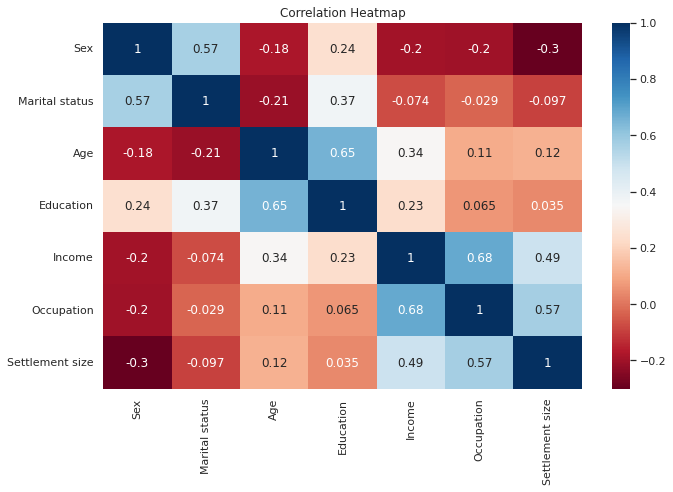

In [335]:
_ = plt.figure(figsize=(10,7))
_ = sns.heatmap(segment_df.corr(), annot=True, cmap='RdBu')
_ = plt.title('Correlation Heatmap', fontsize=12)
_ = plt.tight_layout()
_ = plt.show()

<p><b>From above, we see that Age and Income are correlated to each other. Let's prepare a scatter plot of these two features.</b></p>

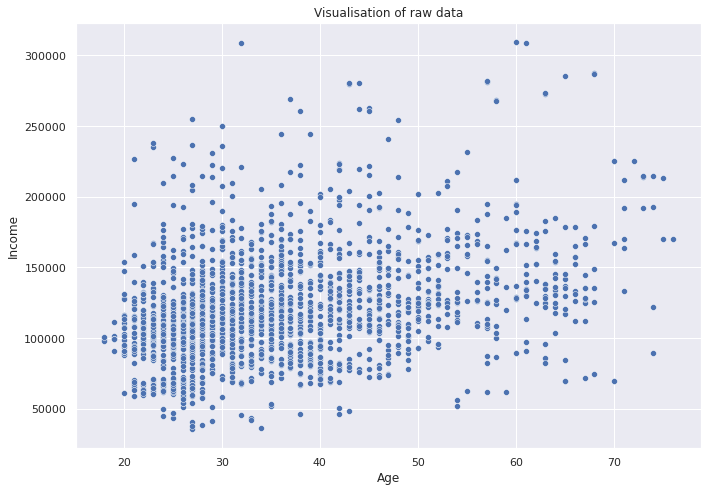

In [336]:
_ = plt.figure(figsize=(10,7))
_ = sns.scatterplot(x = segment_df['Age'], y = segment_df['Income'])
_ = plt.title('Visualisation of raw data')
_ = plt.tight_layout()
_ = plt.show()

# Standardization
<p><b>We need to apply standardization to our features before using any distance-based machine learning model such as K-Means, KNN.</b></p>
<p><b>In general, We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].</b></p>
<p><b>This process is commonly referred to as Standardization.</b></p>

In [337]:
# Import required library
from sklearn.preprocessing import StandardScaler

In [338]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
df_std = scaler.fit_transform(segment_df)

In [339]:
print(df_std)

[[-0.91739884 -0.99302433  2.65361447 ...  0.09752361  0.29682303
   1.552326  ]
 [ 1.09003844  1.00702467 -1.18713209 ...  0.78265438  0.29682303
   1.552326  ]
 [-0.91739884 -0.99302433  1.11731585 ... -0.83320224 -1.26952539
  -0.90972951]
 ...
 [-0.91739884 -0.99302433 -0.41898277 ... -0.90695688 -1.26952539
  -0.90972951]
 [ 1.09003844  1.00702467 -1.01643224 ... -0.60332923 -1.26952539
  -0.90972951]
 [-0.91739884 -0.99302433 -0.93108232 ... -1.3789866  -1.26952539
  -0.90972951]]


# K-Means Clustering

In [340]:
# Import K-Means from sklearn
from sklearn.cluster import KMeans

In [341]:
# Let's prepare a algorithm to choose number of clusters
ks = range(1,11)
wcss = [] #wcss - within clusters sum of squares

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k, init='k-means++', random_state=42)
    
    # Fit model to samples
    model.fit(segment_df)
    
    # Append the inertia to the list of inertias
    wcss.append(model.inertia_)

In [342]:
print(wcss)

[2903113032648.6436, 1214585356374.6794, 673031260903.3563, 377115133346.29895, 248987940956.22864, 177016414706.4447, 129505881424.68318, 96349421525.35399, 78572993039.84567, 64500061225.677795]


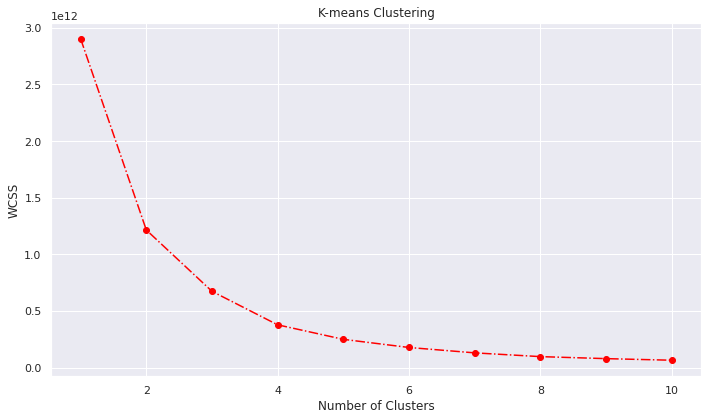

In [343]:
# Plot wcss with number of clusters
# From this plot we choose the number of clusters.
_ = plt.figure(figsize=(10,6))
_ = plt.plot(ks, wcss, marker='o', linestyle='-.', color='red')
_ = plt.xlabel('Number of Clusters')
_ = plt.ylabel('WCSS')
_ = plt.title('K-means Clustering')
_ = plt.tight_layout()
_ = plt.show()

<p><b>The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward. <u>Let’s perform K-Means clustering with 4 clusters.</u></b></p>

In [344]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [345]:
# We divide our data into the four clusters.
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [346]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= segment_df.copy()
# df_segm_kmeans = pd.DataFrame(data = segment_df, columns = segment_df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [347]:
segment_df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [348]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


<p><b>We now see the segments with our dataset.</b></p>

In [349]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


##### It’s time to interpret our new dataset,
<p><b>Segment:1</b> - It has almost the same number of men and women with an average age of 56. Compared to other clusters, we realize that this is the oldest segment. Almost all parameters are in high values. So, <u>"well-off"</u>.</p>
<p><b>Segment:2</b> - This segment has the lowest annual salary. Living in small cities. So, this is a segment of people with <u>"less-opportunities"</u>.</p>
<p><b>Segment:3</b> - It is comprised almost entirely of men, less than 20 percent of whom are in relationships. Low education but income + occupation is high. And, lived in big/mid sized cities. Should be <u>"focused"</u>.</p>
<p><b>Segment:4</b> - This segment has young people with average age of 29. They have medium education and average income. Most of the parameters in this segment are average, so we can called this segment as <u>"average"</u>.</p>

In [350]:
df_segm_analysis.rename({0:'well-off',
                         1:'less-opportunities',
                         2:'focused',
                         3:'average'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
less-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
average,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [351]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'less-opportunities',
                                                                  2:'focused', 
                                                                  3:'average'})

In [352]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,3,average
100000003,0,0,49,1,89210,0,0,1,less-opportunities
100000004,0,0,45,1,171565,1,1,2,focused
100000005,0,0,53,1,149031,1,1,2,focused


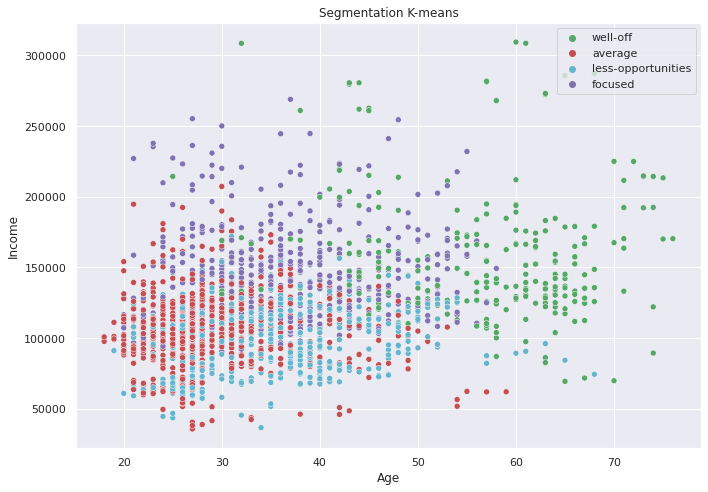

In [353]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
_ = plt.figure(figsize = (10, 7))
_ = sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
_ = plt.title('Segmentation K-means')
_ = plt.legend(loc='upper right')
_ = plt.tight_layout()
_ = plt.show()

<p><b>Green segment (well-off) is clearly separated because high values in age and income as compared to others. Also, remaining three segments are grouped together. It's difficult to separate segments from each other</b></p>

# PCA with K-Means

In [354]:
# Import necessary library
from sklearn.decomposition import PCA

In [355]:
# Initialize PCA
pca = PCA()

In [356]:
# Fit standardized data
pca.fit(df_std)

PCA()

In [357]:
# The attribute shows how much variance is explained by each of the seven individual components.
print(pca.explained_variance_ratio_)

[0.35696328 0.26250923 0.18821114 0.0755775  0.05716512 0.03954794
 0.02002579]


<p><b>We observe that the first component explains around 36 % of the variability of the data. The second one is 26 % and so on.</b></p>

<p><b>We now can plot the cumulative sum of explained variance.</b></p>

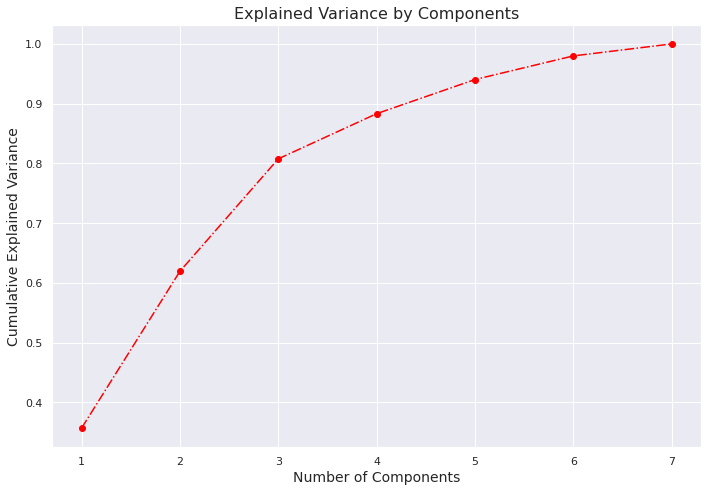

In [358]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
_ = plt.figure(figsize=(10,7))
_ = plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
_ = plt.title('Explained Variance by Components',fontsize=16)
_ = plt.xlabel('Number of Components',fontsize=14)
_ = plt.ylabel('Cumulative Explained Variance',fontsize=14)
_ = plt.tight_layout()
_ = plt.show()

<p><b>As per rule, we need to keep 80% of explained variance. Let's keep the first 3 components.</b></p>

In [359]:
pca = PCA(n_components=3)

In [360]:
pca.fit(df_std)

PCA(n_components=3)

In [361]:
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
print(pca.components_)

[[-0.31469524 -0.19170439  0.32609979  0.15684089  0.52452463  0.49205868
   0.46478852]
 [ 0.45800608  0.51263492  0.31220793  0.63980683  0.12468314  0.01465779
  -0.06963165]
 [-0.29301261 -0.44197739  0.60954372  0.27560461 -0.16566231 -0.39550539
  -0.29568503]]


<p><b>Put the above information in pandas and have a nice look.</b></p>

In [362]:
# Columns are seven original features and rows are the three components
df_pca_comp = pd.DataFrame(data = pca.components_, columns=segment_df.columns, index = ['Component 1', 'Component 2', 'Component 3'])

In [363]:
df_pca_comp.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


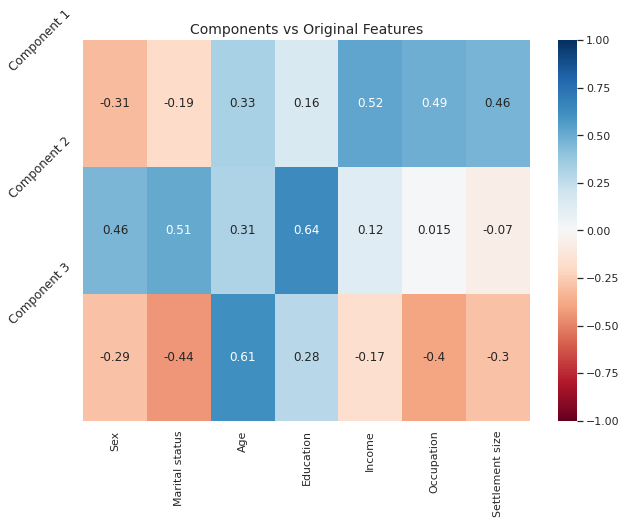

In [364]:
# Heat Map for Principal Components against original features. 
# Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(10,7))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

<p><b>Let's itrepret the above results.
<ul>
    <li><u>Component 1</u>: There is positive correlation betwee Componenet 1 and Age, income, occupation & settlement size. So, you can say that this components shows career focus of the individual.</li>
    <li><u>Component 2</u>: Sex, Marital status and Education are by far the most prominent determinants.</li>
    <li><u>Component 3</u>: we realize that Age, Marital Status, and Occupation are the most important features. We observed that marital status and occupation load negatively but are still important.</li>
    </ul>
<p><b>Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.</b></p>

<b>Let’s transform our data and save it scores_pca.</b>

In [365]:
scores_pca = pca.transform(df_std)

# K-means clustering with PCA

In [366]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

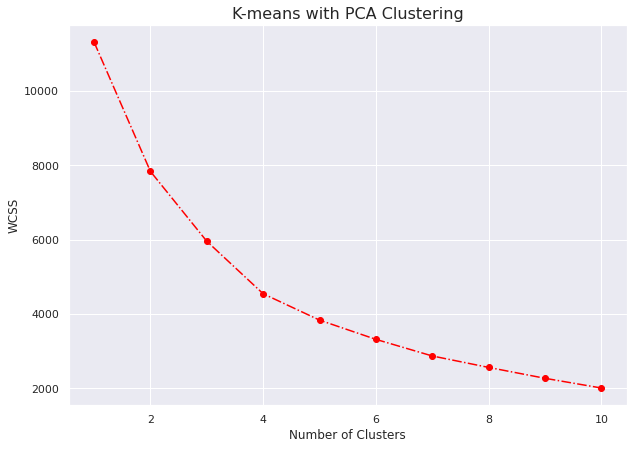

In [367]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
_ = plt.xlabel('Number of Clusters')
_ = plt.ylabel('WCSS')
_ = plt.title('K-means with PCA Clustering',fontsize = 16)
_ = plt.show()

<b>We see that the optimal cluster number by within sum of square is 4.</b>

In [368]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [369]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

# K-Means Clustering With PCA Results

In [370]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([segment_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [371]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [372]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


In [373]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'less-opportunities', 
                                                          1:'focused',
                                                          2:'average', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
less-opportunities,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
average,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


In [374]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'less-opportunities', 
                                                          1:'focused',
                                                          2:'average', 
                                                          3:'well-off'})

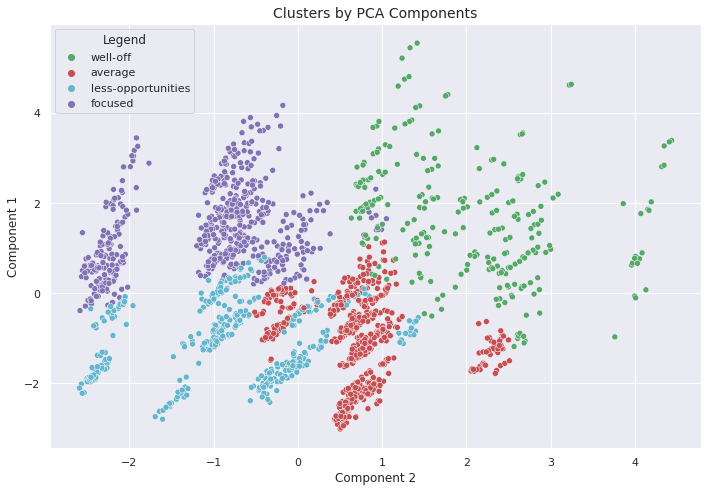

In [376]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
_ = plt.figure(figsize = (10, 7))
_ = sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
_ = plt.title('Clusters by PCA Components',fontsize=14)
_ = plt.tight_layout()
_ = plt.show()

<p><b>When we plotted the K means clustering solution without PCA, we were only able to distinguish the green segment, but the division based on the components is much more pronounced.</b></p>
<p><b>That was one of the biggest goals of PCA to reduce the number of variables by combining them into bigger ones.</b></p>

# Conclusion

<p><b>We segmented our customers into 4 groups. We are ready to start to choose our groups based on our aims and marketing them!</b></p>
<p><b>Segmentation helps marketers to be more efficient in terms of time, money and other resources.</b></p>
<p><b>They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products.</b></p>